<h1 align="center"> Project Milestone 2 </h1>
<h2 align="center"> Consumer Financial Protection Bureau Data Analytics </h2>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python </h3>
<h3 align="center"> By: Group 2 </h3>
<h3 align="center"> Date: 10/30/2022 </h3>

# 1. Introduction

The Consumer Financial Protection Bureau (CFPB) complaints data, when applied to analytics, can help expose areas of harmful communication tactics followed by financial institutions, inaccurate disclosures to customers, or discriminatory lending practices (Booker, 2015). This data aims to analyze the dataset available to practice identifying the most common financial issues reported, trends in the reported issues, and highlight any financial fraudulent behaviors occurring.

The data contains a Boolean element indicating if the customer contested the complaint further. This field was compared to companies, locations, and issue categories to better help understand possibly fraudulent trends followed by certain firm branches, or just people from certain localities who have a tendency to debate their claims further. A time-phased analysis of complaints was used to detect yearly and seasonal trends and peak times for complaints in addition to comparing any anomalies with external financial factors not reported in the dataset such as the outside effects such as the economic impact of the COVID pandemic that subsequently had an effect on the companies' practices/consumers' complaints.

This dataset is meant to be used to answer research points of customer behavior and demographics from the following data:

Time-phased spikes in complaints, how common are certain customer complaints and the distribution of complaints, response times in companies, trends and categories in complaints

Next the distribution of rural vs urban customer complaints via zipcodes are studied to see it there is a linkage to disproportionate complaints from communities with possible language limitations or immigrant statuses. Median income of customer complaints via zip code are studied to find a possible linkage to which customers get prioritized within the data.
 
Previously, it was concluded that time-phased analysis of complaints is remarkably useful for detecting yearly and seasonal trends and peak times in complaints in addition to comparing any anomalies with external financial factors not reported in the dataset. By digging deeper in our data aggregation, this can be useful for companies to better analyze and deal with complaints.

If particular financial institutions are discovered to have a trend of protracted response time to specific kinds of complaints, while other institutions rather reply quickly to, we would be able to identify corporations that may be engaging in potentially fraudulent activities. This can further be used to identify and address concerns of demographic-based fraud. The time-phased analysis of complaints are shown to be particularly helpful for detecting the peak times of complaints and tracking its yearly and seasonal trends. Additionally, it is also particularly useful in comparing any anomalies that include external financial factors not addressed within the dataset.

# 2. Data Source and Collection

According to the Consumer Financial Protection Bureau (CFPB), the customer complaints data collection spans 12 years (2011-2022), and a total of 1,048,575 consumer complaints were acquired from the CFPB online-public database in September 2022. The acquired dataset contains the consumer complaint's issue, which is classified by product (bank account, credit card, mortgage, etc.) and recorded against the complaint time, location (state and ZIP code), and financial institution in question. Furthermore, the dataset describes how the data was collected from the consumer, whether by phone, website, or referral, which may provide insight into the trend in submissions when compared to the nature of the complaint, its urgency, and location (whether rural with limited access to computers or urban...). Importantly, the complaints include a boolean answer (yes/no) of the concerned financial institution's prompt response within 15 days of the complaint filing. When the timely responses to the complaint themes are compared, it becomes clear which concerns take more time to be fixed properly. Importantly, if particular financial institutions are discovered to have a trend of protracted response time to specific kinds of complaints, while other institutions rather reply quickly to, we would be able to identify corporations that may be engaging in potentially fraudulent activities. The latter might be further exaggerated when evaluating the regional distribution of response time and raising the red flag of demographic-based fraud. Fraud victimization occurs in a variety of populations and differs in urban and rural locations throughout all 50 states. Payday loan, student debt relief, health care, and business opportunity scams are among the fraudulent operations. The database generally updates daily.

Each week there are thousands of consumer complaints about financial products and services that are being sent to appropriate companies for response. Data from those complaints helps us understand the financial marketplace and protect consumers.CFPB shares the complaint data with state and federal agencies, as well as presents reports to Congress. Data is being analyzed to help with supervising companies, enforcing federal consumer financial laws, and writing better rules and regulations.Eventually, the complaints are published in the Consumer Complaint Database. However, in order for it to be published, there is a certain criteria and the company needs to respond to them or 15 days need to pass, whichever comes first.

Consumer complaint narrative is a comment submitted by each consumer of what has taken place from the complaint. Consumers must opt-in to share their narrative. Some of the personal information submitted only helps companies identift the customers, but will not be published along with our data in the database. The company has an option to choose whether they want to take into a consideration certain complaints. Companies can choose to select a response from a pre-determined list of options that will be posted on the public database. For instance, “Company believes complaint is the result of an isolated error.”

# 3. Data Manipulation

## 3.1 Import Libraries and Configure Settings

In [1]:
import pandas as pd
#import seaborn as sb #or sns, sns more common
import matplotlib.pyplot as plt
from scipy import stats
#import seaborn as sns

%pylab inline
# or use "%matplotlib inline"

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 3.2 Import Dataset

In [35]:
complaint_data = pd.read_csv('complaints.csv', low_memory=False)
complaint_data.columns = [re.sub(' ', '', c) for c in complaint_data.columns]
complaint_data.columns = [re.sub('\?', '', c) for c in complaint_data.columns]
complaint_data.info()
complaint_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033308 entries, 0 to 3033307
Data columns (total 18 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   Datereceived                object
 1   Product                     object
 2   Sub-product                 object
 3   Issue                       object
 4   Sub-issue                   object
 5   Consumercomplaintnarrative  object
 6   Companypublicresponse       object
 7   Company                     object
 8   State                       object
 9   ZIPcode                     object
 10  Tags                        object
 11  Consumerconsentprovided     object
 12  Submittedvia                object
 13  Datesenttocompany           object
 14  Companyresponsetoconsumer   object
 15  Timelyresponse              object
 16  Consumerdisputed            object
 17  ComplaintID                 int64 
dtypes: int64(1), object(17)
memory usage: 416.6+ MB


,Datereceived,Product,Sub-product,Issue,Sub-issue,Consumercomplaintnarrative,Companypublicresponse,Company,State,ZIPcode,Tags,Consumerconsentprovided,Submittedvia,Datesenttocompany,Companyresponsetoconsumer,Timelyresponse,Consumerdisputed,ComplaintID
0,2022-10-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",NY,10457,NaN,NaN,Web,2022-10-27,In progress,Yes,NaN,6133674
1,2022-10-21,Mortgage,VA mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,KY,40047,Servicemember,NaN,Web,2022-10-21,Closed with explanation,Yes,NaN,6112254
2,2022-10-19,Mortgage,VA mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,TX,76502,Servicemember,NaN,Web,2022-10-19,Closed with explanation,Yes,NaN,6105001
3,2022-10-13,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,VA,22308,Servicemember,Consent not provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6084363
4,2022-10-28,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CA,93560,NaN,NaN,Web,2022-10-28,In progress,Yes,NaN,6134907


In [36]:
type(complaint_data)

pandas.core.frame.DataFrame

# 3.3 Data Manipulation

In [37]:
Dat1=complaint_data
Dat1.head()

,Datereceived,Product,Sub-product,Issue,Sub-issue,Consumercomplaintnarrative,Companypublicresponse,Company,State,ZIPcode,Tags,Consumerconsentprovided,Submittedvia,Datesenttocompany,Companyresponsetoconsumer,Timelyresponse,Consumerdisputed,ComplaintID
0,2022-10-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",NY,10457,NaN,NaN,Web,2022-10-27,In progress,Yes,NaN,6133674
1,2022-10-21,Mortgage,VA mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,KY,40047,Servicemember,NaN,Web,2022-10-21,Closed with explanation,Yes,NaN,6112254
2,2022-10-19,Mortgage,VA mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,TX,76502,Servicemember,NaN,Web,2022-10-19,Closed with explanation,Yes,NaN,6105001
3,2022-10-13,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,VA,22308,Servicemember,Consent not provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6084363
4,2022-10-28,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CA,93560,NaN,NaN,Web,2022-10-28,In progress,Yes,NaN,6134907


In [41]:
dates = Dat1['Datereceived'].str.split('-', expand=True)

In [42]:
dates.head()

,0,1,2
0,2022,10,27
1,2022,10,21
2,2022,10,19
3,2022,10,13
4,2022,10,28


In [43]:
dates = dates.rename(columns = {0:'Month',
                          1:'Day', 
                          2:'Year'})

dates.head()

,Month,Day,Year
0,2022,10,27
1,2022,10,21
2,2022,10,19
3,2022,10,13
4,2022,10,28


In [44]:
Dat2 = pd.concat([Dat1, dates], axis = 1)
Dat2.head()

,Datereceived,Product,Sub-product,Issue,Sub-issue,Consumercomplaintnarrative,Companypublicresponse,Company,State,ZIPcode,...,Consumerconsentprovided,Submittedvia,Datesenttocompany,Companyresponsetoconsumer,Timelyresponse,Consumerdisputed,ComplaintID,Month,Day,Year
0,2022-10-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",NY,10457,...,NaN,Web,2022-10-27,In progress,Yes,NaN,6133674,2022,10,27
1,2022-10-21,Mortgage,VA mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,KY,40047,...,NaN,Web,2022-10-21,Closed with explanation,Yes,NaN,6112254,2022,10,21
2,2022-10-19,Mortgage,VA mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,TX,76502,...,NaN,Web,2022-10-19,Closed with explanation,Yes,NaN,6105001,2022,10,19
3,2022-10-13,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,VA,22308,...,Consent not provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6084363,2022,10,13
4,2022-10-28,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CA,93560,...,NaN,Web,2022-10-28,In progress,Yes,NaN,6134907,2022,10,28


In [45]:
#Transform the request time and Date sent to company from strings to datatime objects

Dat2['Datereceived'] = pd.to_datetime(Dat2['Datereceived'])
                                                 
Dat2['Datesenttocompany'] = pd.to_datetime(Dat2['Datesenttocompany'])

Dat2.head()

,Datereceived,Product,Sub-product,Issue,Sub-issue,Consumercomplaintnarrative,Companypublicresponse,Company,State,ZIPcode,...,Consumerconsentprovided,Submittedvia,Datesenttocompany,Companyresponsetoconsumer,Timelyresponse,Consumerdisputed,ComplaintID,Month,Day,Year
0,2022-10-27,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",NY,10457,...,NaN,Web,2022-10-27,In progress,Yes,NaN,6133674,2022,10,27
1,2022-10-21,Mortgage,VA mortgage,Applying for a mortgage or refinancing an exis...,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,KY,40047,...,NaN,Web,2022-10-21,Closed with explanation,Yes,NaN,6112254,2022,10,21
2,2022-10-19,Mortgage,VA mortgage,Struggling to pay mortgage,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,TX,76502,...,NaN,Web,2022-10-19,Closed with explanation,Yes,NaN,6105001,2022,10,19
3,2022-10-13,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,Freedom Mortgage Company,VA,22308,...,Consent not provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6084363,2022,10,13
4,2022-10-28,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CA,93560,...,NaN,Web,2022-10-28,In progress,Yes,NaN,6134907,2022,10,28


In [46]:
Dat2.dtypes

Datereceived                  datetime64[ns]
Product                               object
Sub-product                           object
Issue                                 object
Sub-issue                             object
Consumercomplaintnarrative            object
Companypublicresponse                 object
Company                               object
State                                 object
ZIPcode                               object
Tags                                  object
Consumerconsentprovided               object
Submittedvia                          object
Datesenttocompany             datetime64[ns]
Companyresponsetoconsumer             object
Timelyresponse                        object
Consumerdisputed                      object
ComplaintID                            int64
Month                                 object
Day                                   object
Year                                  object
dtype: object

In [47]:
Dat2=Dat2.assign(count='1')

In [48]:
Dat2['Year'] = Dat2['Year'].astype('int64')
Dat2['count'] = Dat2['count'].astype('int64')

In [49]:
Dat2.dtypes

Datereceived                  datetime64[ns]
Product                               object
Sub-product                           object
Issue                                 object
Sub-issue                             object
Consumercomplaintnarrative            object
Companypublicresponse                 object
Company                               object
State                                 object
ZIPcode                               object
Tags                                  object
Consumerconsentprovided               object
Submittedvia                          object
Datesenttocompany             datetime64[ns]
Companyresponsetoconsumer             object
Timelyresponse                        object
Consumerdisputed                      object
ComplaintID                            int64
Month                                 object
Day                                   object
Year                                   int64
count                                  int64
dtype: obj

As we do not have numerical data (ZIP code and complaint ID are to be used as nominal data), data rescaling is not required. Additionally, correlation and summary statistics cannot be generated due to their inapplicability on qualitative data. We can go for dummy variables from now, but we will leave this till extended analysis when it is required certainly, to save on computational power especially with such a large dataset.
Additionally, we opted to not drop NA from now to see the full scope of data first, namely in the graphics below, but we might need to drop NA in further analysis.

# 4. Data Visualization

Trend of yearly complaints:

In [50]:
#Time-phased spike in complaints
dates = complaint_data['Datereceived']
dates = dates.str[:-6]
dates = pd.to_numeric(dates)

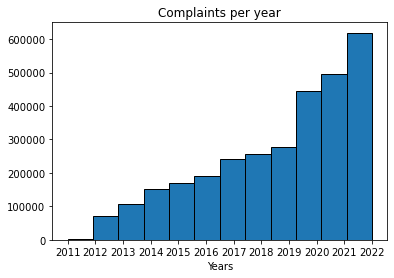

In [51]:
plt.hist(dates, bins=12, edgecolor='black')
plt.title('Complaints per year')
plt.xlabel('Years')
plt.xticks(range(2011, 2023))
plt.show()

We could see a tremendous increase of complaints over the years.

By State

In [56]:
States_complaints =  Dat2[['State','count']].groupby('State').sum()
States_complaints.head()
States_complaints.reset_index()

,State,count
0,AA,50
1,AE,872
2,AK,2796
3,AL,55608
4,AP,581
...,...,...
58,VT,2614
59,WA,43316
60,WI,25583
61,WV,5488


In [57]:
#sorting in descending order of 'Current'
States_complaints = States_complaints.sort_values(by="count",ascending=False)
States_complaints

,count
State,
CA,371763
FL,338514
TX,295417
NY,198964
GA,189013
...,...
AA,50
MP,44
AS,38


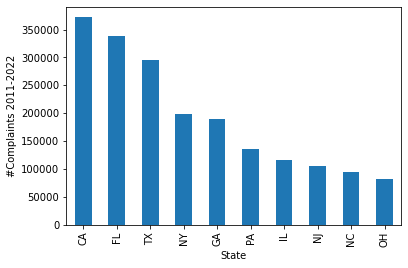

In [58]:
#Top 10 states by complaints
States_complaints[0:10].plot(kind="bar", legend = False)
plt.xlabel("State")
plt.ylabel("#Complaints 2011-2022")
plt.show()

Number of unique product Reporting

In [59]:
Dat2['Product'].nunique()

18

There are 18 products/themes (such as credit reporting)

In [65]:
Product_complaints =  Dat2[['Product','count']].groupby('Product').sum()
Product_complaints.head()
Product_complaints.reset_index()

,Product,count
0,Bank account or service,86206
1,Checking or savings account,139122
2,Consumer Loan,31598
3,Credit card,89190
4,Credit card or prepaid card,162359
5,Credit reporting,140430
6,"Credit reporting, credit repair services, or o...",1377550
7,Debt collection,448757
8,"Money transfer, virtual currency, or money ser...",46653
9,Money transfers,5354


In [66]:
#sorting in descending order of 'Current'
Product_complaints = Product_complaints.sort_values(by="count",ascending=False)
Product_complaints

,count
Product,
"Credit reporting, credit repair services, or other personal consumer reports",1377550
Debt collection,448757
Mortgage,363773
Credit card or prepaid card,162359
Credit reporting,140430
Checking or savings account,139122
Credit card,89190
Bank account or service,86206
Student loan,70632


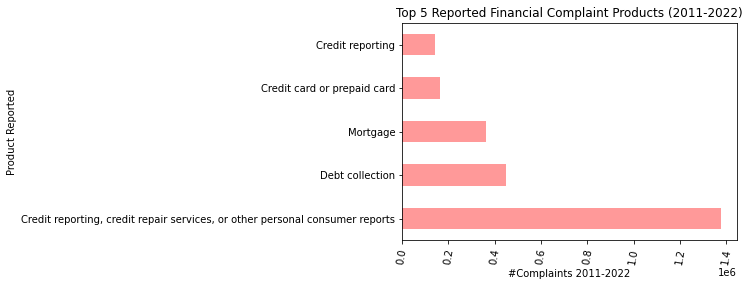

In [67]:
#Top 5 states by complaints
Product_complaints[0:5].plot(kind="barh", color='r', alpha=0.4, legend = False)

plt.title('Top 5 Reported Financial Complaint Products (2011-2022)')

plt.xlabel("#Complaints 2011-2022")
plt.xticks(rotation = 80)
plt.ylabel("Product Reported")
plt.show()

We could see that the credit reporting and the debt collection are the most reported products by consumers.
This gives us insight on the major elements and underlying facts that the model will be shaped to reflect accordingly.

More in depth data visualization will be carried out as the exploration of the dataset continues, allowing us to formulate the approach that the modeling will take

# Reference

Booker, S. W. Mortgage servicing and debt collection among major issues according to EY analysis of consumer financial protection bureau (CFPB) complaint data: - analysis shows complaints increased monthly to more than 14,100 in 2015 from 9,022 in 2013. (2015, Nov 18). PR Newswire Retrieved from https://www.proquest.com/wire-feeds/mortgage-servicing-debt-collection-among-major/docview/1733899748/se-2